In [ ]:
#Import Library
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#  Import and read csv
 
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
# Identify columns
df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [ ]:
# Identify data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [ ]:
len(df['shop_id'].unique())

100

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
len(df['created_at'].dt.month.unique())

1

In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
df.corr()

,order_id,shop_id,user_id,order_amount,total_items
order_id,1.000000,-0.005967,0.002881,-0.005565,-0.006768
shop_id,-0.005967,1.000000,0.009033,-0.005559,-0.016304
user_id,0.002881,0.009033,1.000000,-0.158104,-0.161247
order_amount,-0.005565,-0.005559,-0.158104,1.000000,0.991747
total_items,-0.006768,-0.016304,-0.161247,0.991747,1.000000


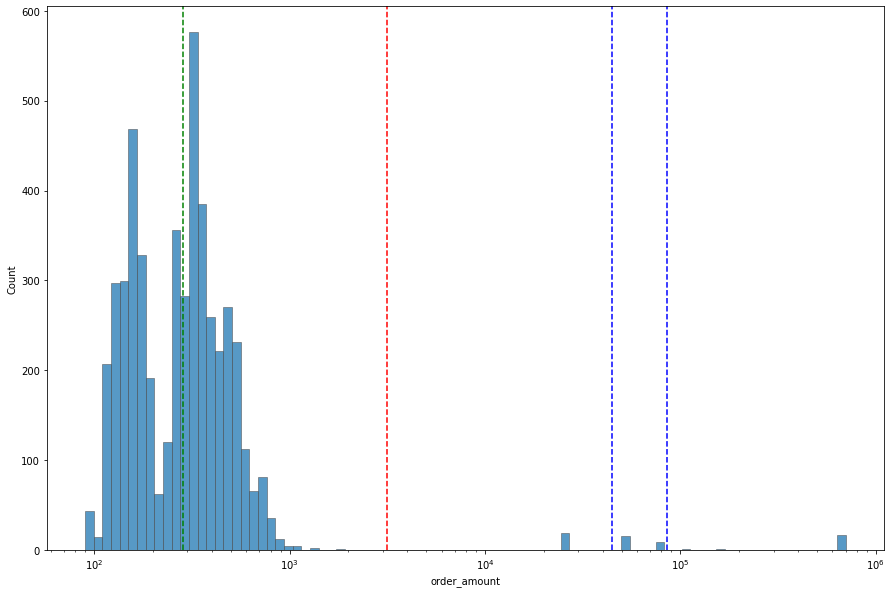

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.histplot(df['order_amount'], log_scale=True, kde=False, edgecolor=".3", linewidth=.5)
mean=df['order_amount'].mean()
median=df['order_amount'].median()
std=df['order_amount'].std()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')
plt.axvline(mean+2*std, color='b', linestyle='--')
plt.axvline(mean+std, color='b', linestyle='--')

In [ ]:
The chart demonstrates existance of 6 outliers for the order_amount between 10^4 and 10^6.  
This significantly effects the AOV.  Eliminating the ouliers will 
allow for accurate metric.

In [ ]:
df['order_amount'].mean()

3145.128

1. Remove the outliers
2. Utilize the median
3. Acquire the data nth   percent
4. New Mean, Quartiles

In [ ]:
df_no_outliers = df[df['order_amount'] < (10**3)]

In [ ]:
df['order_amount'].median()

284.0

In [ ]:
percentile_97 = df['order_amount'].quantile(.97, interpolation='higher')
percentile_97

712

In [ ]:
no_outlier_percentile = df[df['order_amount'] <= percentile_97]

In [ ]:
no_outlier_percentile['order_amount'].mean()

293.27070457354756

In [ ]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
Q1, Q3

(163.0, 390.0)

In [ ]:
iQr = Q3-Q1
iQr

227.0

In [ ]:
Upper_limit = Q3 + 1.5*iQr
Upper_limit

730.5

In [ ]:
df[(df['order_amount']<=Upper_limit)]['order_amount'].mean()

293.7153735336489

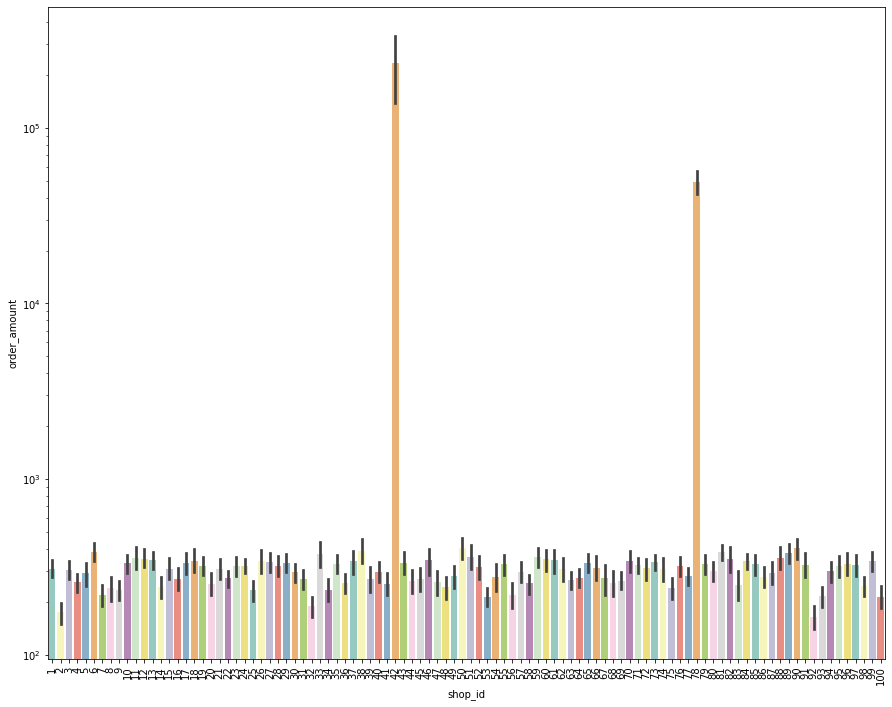

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(x="shop_id", y="order_amount", data=df, palette="Set3")
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# get mean, min, max per store
stores = df.groupby(['shop_id']).agg({'order_amount': ['mean', 'min', 'max']})

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
stores

order_amount          
                mean  min  max
shop_id                       
1         308.818182  158  632
2         174.327273   94  470
3         305.250000  148  592
4         258.509804  128  512
5         290.311111  142  710
...              ...  ...  ...
96        330.000000  153  765
97        324.000000  162  810
98        245.362069  133  532
99        339.444444  195  780
100       213.675000  111  444

[100 rows x 3 columns]